In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rosbag
from scipy.signal import savgol_filter
%matplotlib inline
plt.style.use('seaborn')

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [2]:
ls

log_brake_2020-07-16-11-38-14.bag       log_steer.ipynb
log_brake_baru_2020-07-16-11-51-28.bag  test.bag
log_brake.ipynb                         test.ipynb
log_steer_2020-07-15-14-24-24.bag


In [3]:
bag = rosbag.Bag('log_brake_baru_2020-07-16-11-51-28.bag')
#bag = rosbag.Bag('log_brake_2020-07-16-11-38-14.bag')
bag.get_type_and_topic_info()

TypesAndTopicsTuple(msg_types={'pkg_ta/LogArduino': 'ea393fd09273b840e55feba3bf682d96'}, topics={'/logging_brake': TopicTuple(msg_type='pkg_ta/LogArduino', message_count=64982, connections=1, frequency=248.3453135176742)})

In [4]:
list_topic = []
list_msg = []
list_t = []
list_seq = []
list_t_header = []
"""
list_steering_setpoint = []
list_steering_delta = []
list_steering_angle = []
list_steering_absolute_encoder = []
"""
list_brake_setpoint = []
list_brake_current = []
list_brake_current_sensor = []
list_brake_position = []
list_brake_linear_encoder = []
list_brake_pwm = []
list_braking_delta = []

for topic, msg, t in bag.read_messages(topics=['/logging_brake']):
    list_topic.append(topic)
    list_msg.append(msg)
    list_t.append(t.secs + t.nsecs/1e9)
    list_seq.append(msg.header.seq)
    list_t_header.append(msg.header.stamp.secs + msg.header.stamp.nsecs / 1e9)
    """
    list_steering_setpoint.append(msg.steering_setpoint)
    list_steering_delta.append(msg.steering_delta)
    list_steering_angle.append(msg.steering_angle)
    list_steering_absolute_encoder.append(msg.steering_absolute_encoder)
    """
    list_brake_setpoint.append(msg.brake_setpoint)
    list_brake_current.append(msg.brake_current)
    list_brake_current_sensor.append(msg.brake_current_sensor)
    list_brake_position.append(msg.brake_position)
    list_brake_linear_encoder.append(msg.brake_linear_encoder)
    list_brake_pwm.append(msg.brake_pwm)
    list_braking_delta.append(msg.braking_delta)
    
list_t = np.array(list_t)
list_t -= list_t[0]
list_t_header = np.array(list_t_header)
list_t_header -= list_t_header[0]

"""
steering_delta = savgol_filter(np.array(list_steering_delta), 51, 3)
steering_angle = savgol_filter(np.array(list_steering_angle), 51, 3)
"""

'\nsteering_delta = savgol_filter(np.array(list_steering_delta), 51, 3)\nsteering_angle = savgol_filter(np.array(list_steering_angle), 51, 3)\n'

In [5]:
dt = list_t[1:] - list_t[:-1]
dt_header = list_t_header[1:] - list_t_header[:-1]

In [6]:
#plt.hist(dt, bins=500, alpha=0.75)
#plt.hist(dt_header, bins=500, alpha=0.5)
plt.show()

In [7]:
print('Sampling Rate yang digunakan di rospy adalah 250 Hz\n')
print('dt')
print('mean: {}'.format(np.mean(dt)))
print('std: {}'.format(np.std(dt)))
print('\ndt_header')
print('mean: {}'.format(np.mean(dt_header)))
print('std: {}'.format(np.std(dt_header)))

Sampling Rate yang digunakan di rospy adalah 250 Hz

dt
mean: 0.004002553655952226
std: 0.0010796383026583875

dt_header
mean: 0.00400254937783919
std: 0.00020045316919757388


In [8]:
for i in range(1, list_t_header.shape[0]):
    if list_t_header[i] - list_t_header[i-1] < 0:
        print(list_t_header[i] - list_t_header[i-1])
        print(i)
    

-0.017191171646118164
3576
-0.0016069412231445312
9202
-0.0014150142669677734
17332
-0.004742860794067383
21086
-0.0011680126190185547
48600
-0.01081705093383789
60479


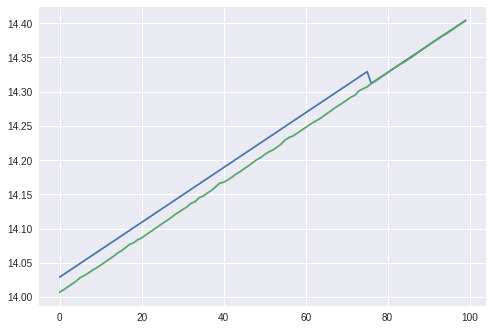

In [9]:
plt.plot(list_t_header[3500:3600])
plt.plot(list_t[3500:3600])

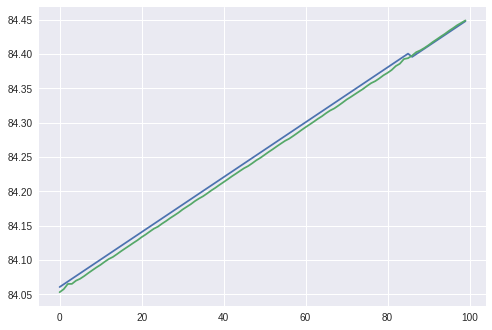

In [10]:
plt.plot(list_t_header[21000:21100])
plt.plot(list_t[21000:21100])

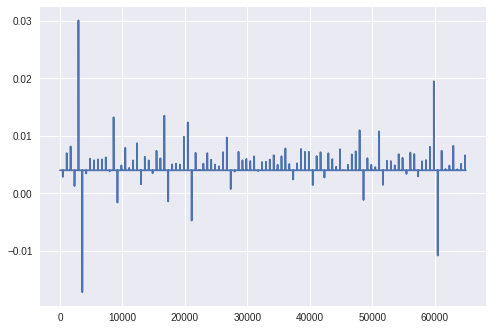

In [11]:
plt.plot(dt_header)

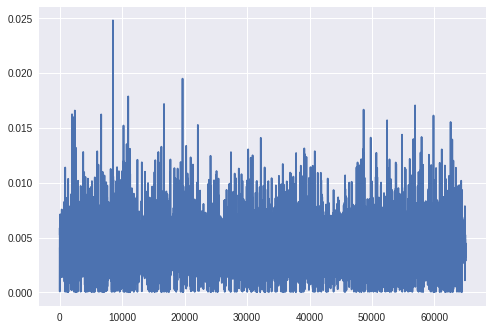

In [12]:
plt.plot(dt)

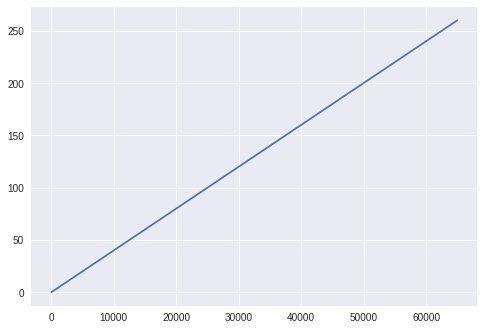

In [13]:
plt.plot(list_t)

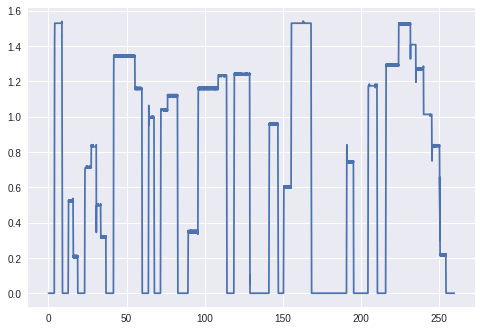

In [14]:
plt.plot(list_t_header, list_brake_position)

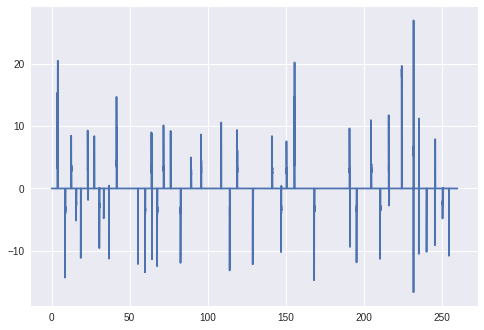

In [15]:
plt.plot(list_t_header, list_brake_current)